# Taller de redes neuronales aplicadas a espectros estelares

En este notebook se va a entrenar una red neuronal utilizando la librería sklearn. En concreto, la red neuronal es un objeto de la clase [sklearn.neural_network.MLPRegresor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). Posteriormente se utilizará la red neuronal entrenada para inferir parámetros astrofísicos de un conjunto de estrellas cuyos espectros fueron medidos con [RAVE](https://www.rave-survey.org/).

Para entrenar dicha red se han generado espectros sintéticos que se han guardado en el fichero *grid_school_v2_8420_8785_003899999999998727.pkl*. Dentro del fichero está guardado, además de los espectros, la temperatura efectiva, el logaritmo de la gravedad y la metalicidad que corresponde a cada espectro; todo ello en formato tabla como un objeto [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). 

Para comenzar importamos las librerías necesarias:

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from warnings import simplefilter
simplefilter(action="ignore",category=FutureWarning)

%matplotlib inline

Además de las librerías que se han mencionado, se han importado las funciones [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) y [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) que serán de utilidad para trabajar con los datos de entrenamiento

In [2]:
# Código auxiliar: aunque no es necesario, se definen las longitudes de onda tanto de las simulaciones como de las observaciones
wlen = np.arange(842,878.5,0.03899999999998727)

## 1 Preparación de los datos



### 1.1 Lectura de las simulaciones

Primero hay que cargar las simulaciones. Para ello hay que utilizar la función *pandas.read_pickle* que acepta como argumento el nombre del fichero a leer y devuelve un *DataFrame* (nota: para llamar a las funciones de pandas hay que usar pd en lugar de pandas, ya que en la cabecera se ha llamado a la instrucción 
```
import pandas as pd
```


In [3]:
grid = pd.read_pickle('data/grid_school_v2_8420_8785_003899999999998727.pkl') # rellenar

Una vez leído, la variable *grid* tiene estructura de tabla, para saber qué columnas hay almacenadas dentro se puede llamar al atributo *columns*.


In [4]:
cols = grid.columns  # rellenar
print(cols) #rellenar

Index(['teff', 'logg', 'm_h', 'spectrum'], dtype='object')


Si se quieren ver las primeras filas de la tabla se puede llamar al método *head()* que tiene todo *DataFrame*. El resultado debería ser igual a

|  |   teff | logg |  m_h |                                          spectrum|
|--|--------|------|------|--------------------------------------------------|
|0 | 3000.0 |  0.0 |-3.00 | [0.9997522849383049, 0.9998009367060697, 0.999...|
|1 | 3000.0 |  0.0 |-2.75 | [0.9997123698112049, 0.9997728740768044, 0.999...|
|2 | 3000.0 |  0.0 |-2.50 | [0.999568427270208, 0.9996652039896338, 0.9997...|
|3 | 3000.0 |  0.0 |-2.25 | [0.9993215807872953, 0.9994811204761738, 0.999...|
|4 | 3000.0 |  0.0 |-2.00 | [0.9991882596346863, 0.9993762569755674, 0.999...|

Por otro lado, si queremos ver una columna en concreto (por ejemplo, la columna j), se puede acceder a ella mediante 
```
nombreDataFrame.iloc[j]
```

In [5]:
# Rellenar la celda para mostrar las primeras filas almacenadas en grid
grid.iloc[10,:]

teff                                                   3000.0
logg                                                      0.0
m_h                                                      -0.5
spectrum    [0.9955001665005673, 0.9965481810866105, 0.997...
Name: 10, dtype: object

### 1.2 Visualización de las simulaciones

En la celda siguiente hay un ejemplo en el que se pinta el espectro almacenado en la primera fila del *DataFrame*.

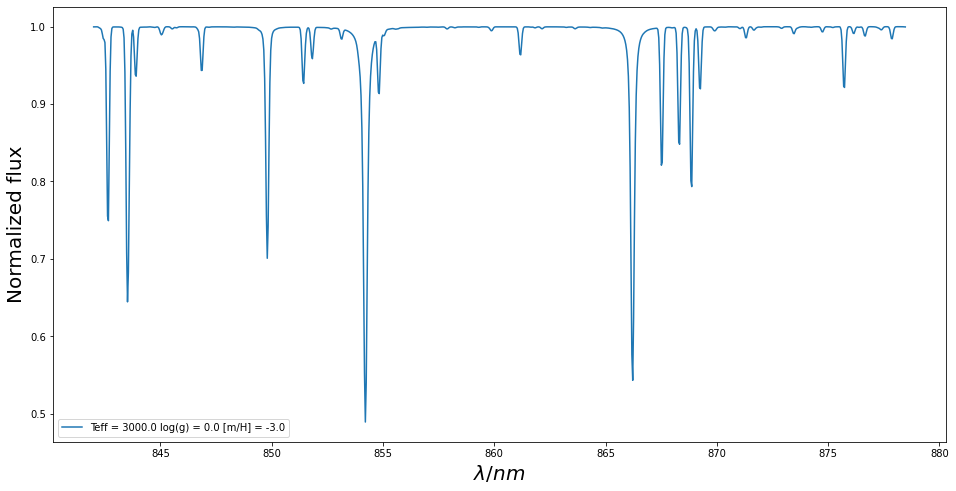

In [6]:
idx = 0
spec = grid["spectrum"].iloc[idx]
teff = grid["teff"].iloc[idx]
logg = grid["logg"].iloc[idx]
mh = grid["m_h"].iloc[idx]
label_spec = "Teff = {} log(g) = {} [m/H] = {}".format(teff,logg,mh)

plt.figure(figsize=(16,8))
plt.plot(wlen,spec,label=label_spec)
plt.xlabel(r"$\lambda /nm$",size=20)
plt.ylabel(r"Normalized flux",size=20)
plt.legend()

En la misma figura se pueden representar varios espectros.

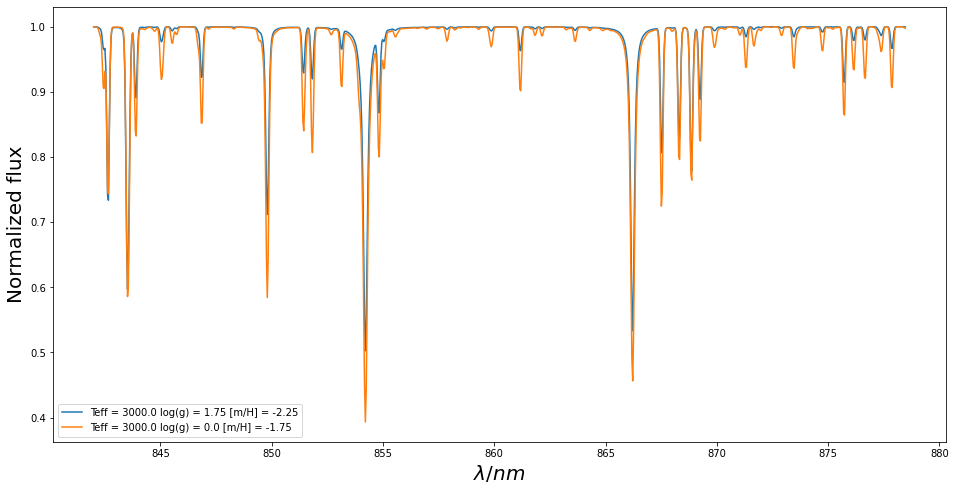

In [7]:
idx1 = 122 # elige una fila para el primer espectro
idx2 = 5 # elige otra fila para el segundo espectro

spec1 = grid["spectrum"].iloc[idx1]
teff1 = grid["teff"].iloc[idx1]
logg1 = grid["logg"].iloc[idx1]
mh1 = grid["m_h"].iloc[idx1]
label_spec1 = "Teff = {} log(g) = {} [m/H] = {}".format(teff1,logg1,mh1)

# rellenar para definir las variables del segundo espectro

spec2 = grid["spectrum"].iloc[idx2]
teff2 = grid["teff"].iloc[idx2]
logg2 = grid["logg"].iloc[idx2]
mh2 = grid["m_h"].iloc[idx2]
label_spec2 = "Teff = {} log(g) = {} [m/H] = {}".format(teff2,logg2,mh2)
    

# rellenar para dibujar los dos espectros

plt.figure(figsize=(16,8))

plt.plot(wlen,spec1,label=label_spec1)
plt.plot(wlen,spec2,label=label_spec2)

plt.xlabel(r"$\lambda /nm$",size=20)
plt.ylabel(r"Normalized flux",size=20)
plt.legend()



Además, se pueden seleccionar las columnas guardadas en el *DataFrame* de *pandas* simplemente poniendo entre corchetes los nombres de las variables

Text(0.5, 0, '$[M/H]$')

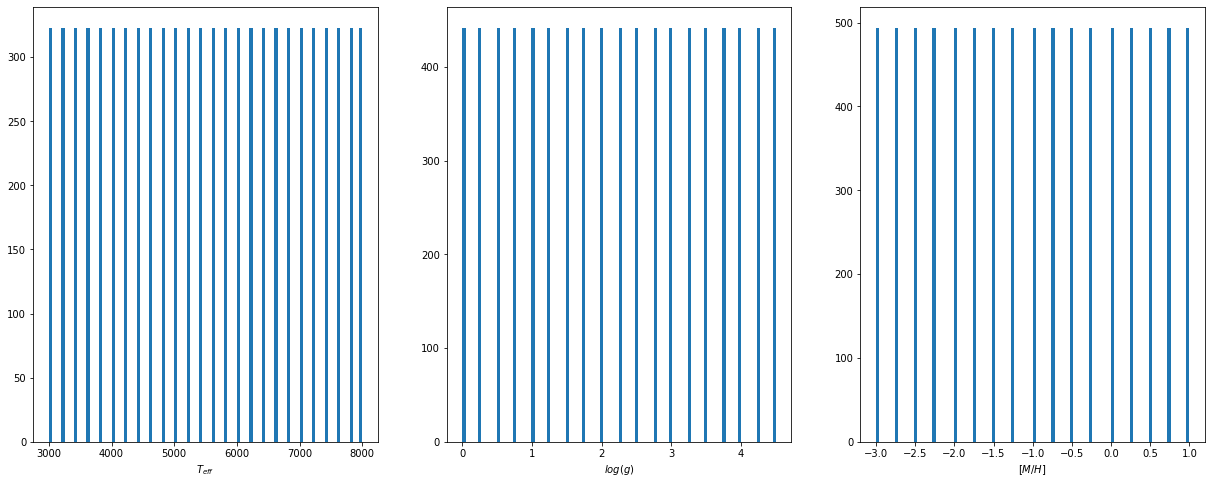

In [8]:
teffs = grid["teff"] # rellenar para escoger la columna de las temperaturas
loggs = grid["logg"] # columna de las gravedades
mhs = grid["m_h"] # columna de las metalicidades

plt.figure(figsize=(21,8))
plt.subplot(131)
plt.hist(teffs,bins=100)
plt.xlabel(r"$T_{eff}$")
plt.subplot(132)
plt.hist(loggs,bins=100)
plt.xlabel(r"$log(g)$")
plt.subplot(133)
plt.hist(mhs,bins=100)
plt.xlabel(r"$[M/H]$")

### 1.3 Preparación de las simulaciones

Una vez observados y entendidos los datos simulados con los que se puede trabajar es cuando se van a preparar para poder usarlos en el entrenamiento de la red neuronal.

La red es lo que se llama un perceptrón totalmente conectado y queremos entrenarlo para que lea un espectro y como resultado nos diga qué parámetros astrofísicos (temperatura efectiva, logaritmo de la gravedad y metalicidad) tiene la estrella que produce dicho espectro. Por tanto, los valores de entrada de la red serán los valores del espectro para las distintas longitudes de onda y los valores de salida serán tres: temperatura, gravedad y metalicidad.

In [9]:
y = grid[["teff","logg","m_h"]].values
x = grid["spectrum"].values # rellenar 
x = np.array([xx.astype(float) for xx in x]) # este paso es necesario debido a la implementación de sklearn

A la hora de ayudar al programa de minimización a encontrar el mínimo es útil escalar las variables de manera que el rango entre ellas sea aproximadamente igual. Para esto vamos a utilizar el objeto [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) de la librería *sklearn*

In [10]:
scaler = MinMaxScaler()
ys = scaler.fit_transform(y) # rellenar con la variable que se quiere escalar

Una vez preprocesados los datos sintéticos hay que decidir qué datos se utilizarán para entrenar y cuáles de ellos (el resto) para comprobar. Ésto se logra fácilmente con la función *train_test_split* que recibe como primer y segundo argumentos dos *arrays* que va a separar en dos conjuntos cada uno de ellos, el conjunto de entrenamiento (*train*) y el conjunto de comprobación (*test*). Además, admite otro argumento mediante la [clave](https://docs.python.org/3/glossary.html#term-argument) *test_size* cuyo valor va de 0 a 1 y que define qué porcentaje de elementos de los arrays se utilizarán para entrenar y qué porcentaje se utilizarán para comprobar. Los valores típicos suelen ser 0.1, 0.15 y 0.2.


In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,ys,test_size=.2) # rellenar

Text(0.5, 0, '$[M/H]$')

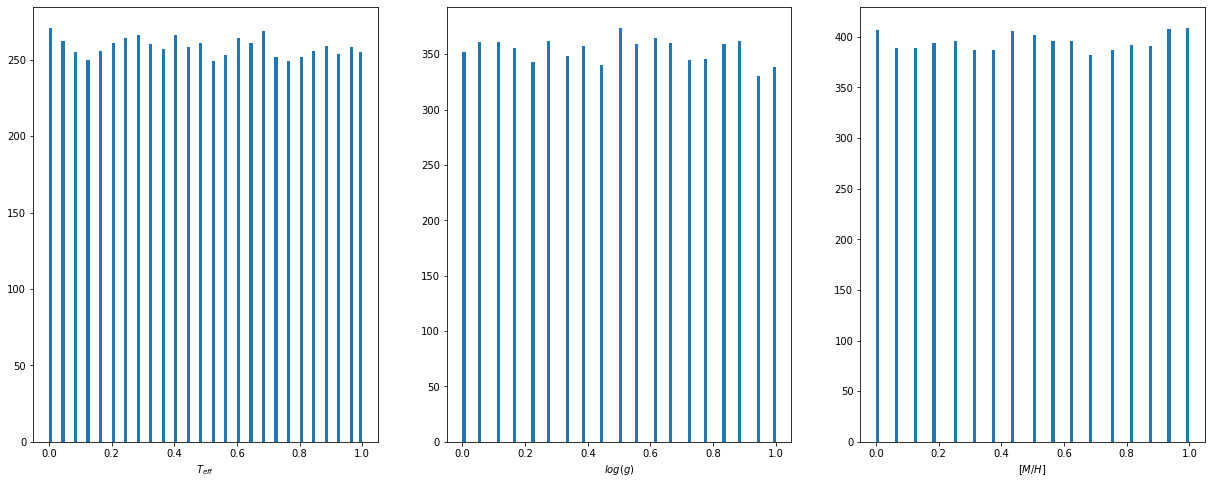

In [12]:
# rellenar la celda para mostrar tres gráficas con las variables de referencia que se usarán para entrenar
# nota: en una celda anterior se mostraron gráficas con los parámetros astrofísicos de entrada, ésta puede ser de ayuda

teffs = ytrain[:,0] # rellenar para escoger la columna de las temperaturas
loggs = ytrain[:,1] # columna de las gravedades
mhs = ytrain[:,2] # columna de las metalicidades

plt.figure(figsize=(21,8))
plt.subplot(131)
plt.hist(teffs,bins=100)
plt.xlabel(r"$T_{eff}$")
plt.subplot(132)
plt.hist(loggs,bins=100)
plt.xlabel(r"$log(g)$")
plt.subplot(133)
plt.hist(mhs,bins=100)
plt.xlabel(r"$[M/H]$")


A la vista de los gráficos anteriores, ¿se distribuyen los datos de entrenamiento como queremos?

## 2 Construcción de la red

La definición de la red se hace a través de parámetros e hiperparámetros. Algunos de ellos hacen referencia a la arquitectura de la propia red mientras que otros definen la estrategia a seguir para la optimización de los parámetros de la red.

### 2.1 Parámetros de la red

Los parámetros que definen la red son las funciones de activación así como el número de capas 
ocultas y de neuronas por capa.

Cuando se trabaja con *MLPRegressor* esto se hace con los argumentos *activation* y *hidden_layer_sizes*.

- activation: función de activación de las neuronas. Admite un sólo valor entre "logistic", "linear", "tanh" y "relu" 
- hidden_layer_sizes: define el número de capas ocultas y el número de neuronas que hay en cada capa. El argumento es una tupla cuya longitud denota el número de capas ocultas y cuyos valores marcan el número de neuronas en las capas. Así, por ejemplo, una neurona con 2 capas ocultas y tres neuronas en cada capa vendría definida por
``` 
hidden_layer_sizes=(3,3)
```

In [13]:
activation = 'logistic' # elegir una función de activación
hidden_layer_sizes = (int(len(wlen)/4)) # elegir el número de capas ocultas así como las neuronas en cada capa
alpha = 1e-3 # término de regularización

### 2.2 Parámetros para el optimizador

Una vez definida la red quedan por definir tanto el optimizador como los parámetros que se 
pasarán a éste.

El primero de ellos es el optimizador que se va a utilizar ("lbfgs", "sgd" o "adam"), mientras que los otros dos hacen referencia al desplazamiento de la solución que se obtiene tras cada iteración. Estos argumentos vienen especificados por *learning_rate_init* y por *learning_rate* que hacen referencia al valor del módulo del desplazamiento y los cambios que se le pueden aplicar respectivamente. Así, un valor de *learning_rate* igual a *"constant"* mantendrá el módulo del paso constante, mientras que *"adaptive"* lo irá variando en función de la solución actual en cada iteración.

In [14]:
solver = 'adam' # elige un optimizador
learning_rate_init = 1e-3 # elige un paso
learning_rate = 'adaptive' # elegir la estrategia a seguir con el paso

El siguiente conjunto de parámetros hace referencia a las iteraciones del optimizador en el proceso de minimización. Éstos son:
- número máximo de iteraciones del optimizador: el optimizador realizará iteraciones hasta que converja o se alcance *max_iter*.
- *tol*: define lo que se entiende por convergencia
- *n_iter_no_change*: número máximo de iteraciones para que la función de pérdida disminuya


In [15]:
max_iter = 400 # número máximo de iteraciones
tol = 1e-4 # tolerancia
n_iter_no_change = 10 # númer máximo de épocas permitidas para que la función de pérdida disminuya

Finalmente, queda por definir el conjunto de validación. Este conjunto se puede definir a mano y no especificar el siguiente conjunto de parámetros, sin embargo, el objeto *MLPRegressor* nos permite hacer el proceso de creación del conjunto de validación simplemente especificando un parámetro

In [16]:
validation_fraction = 0.2 # fracción de elementos de entrada que se usarán para formar el conjunto de validación
early_stopping=True

### 2.3 Definición de la red

In [17]:
net = MLPRegressor(
    activation=activation,
    hidden_layer_sizes=hidden_layer_sizes,
    solver=solver,
    learning_rate_init=learning_rate_init,
    learning_rate=learning_rate,
    max_iter=max_iter,
    tol=tol,
    n_iter_no_change=n_iter_no_change,
    validation_fraction=validation_fraction,
    verbose=True,
    early_stopping=early_stopping)

## 3 Entrenamiento

Una vez definidos los conjuntos de entrenamiento y los parámetros de la red, el entrenamiento se hace a través del método *fit()* que recibe como primer argumento el conjunto de datos de entrada para el entrenamiento y como segundo el conjunto de datos de salida con los que debe contrastar la propia salida de la red. El proceso de ajuste de la red neuronal consiste, precisamente, en comparar las salidas de la red con el conjunto de entrada y minimizar el error cuadrático medio

In [18]:
# rellenar esta celda con la llamada a la función fit para entrenar la red

net.fit(xtrain,ytrain)

Iteration 1, loss = 0.10048209
Validation score: 0.136859
Iteration 2, loss = 0.03675573
Validation score: 0.315859
Iteration 3, loss = 0.02848740
Validation score: 0.424198
Iteration 4, loss = 0.02478411
Validation score: 0.503931
Iteration 5, loss = 0.02214568
Validation score: 0.541471
Iteration 6, loss = 0.02068388
Validation score: 0.564904
Iteration 7, loss = 0.02004295
Validation score: 0.581281
Iteration 8, loss = 0.01917196
Validation score: 0.601942
Iteration 9, loss = 0.01836530
Validation score: 0.605596
Iteration 10, loss = 0.01870577
Validation score: 0.589662
Iteration 11, loss = 0.01678018
Validation score: 0.644150
Iteration 12, loss = 0.01699653
Validation score: 0.653920
Iteration 13, loss = 0.01622619
Validation score: 0.657387
Iteration 14, loss = 0.01607987
Validation score: 0.639565
Iteration 15, loss = 0.01576325
Validation score: 0.672704
Iteration 16, loss = 0.01539873
Validation score: 0.689332
Iteration 17, loss = 0.01495980
Validation score: 0.662795
Iterat

MLPRegressor(activation='logistic', early_stopping=True, hidden_layer_sizes=234,
             learning_rate='adaptive', max_iter=400, validation_fraction=0.2,
             verbose=True)

## 4 Mostrar y guardar los resultados

Cuando el entrenamiento ha terminado los parámetros (b,w) - bias, weight - de la red se han ajustado de manera que ajustan la salida de la red al conjunto de datos *ytrain*. Estos valores se pueden llamar mediante los atributos *intercepts_* y *coefs_*

In [19]:
# Mostrar por pantalla los parámetros b y w de la red nuronal
print(net.intercepts_, net.coefs_)

[array([ 0.01751748,  0.010269  ,  0.03212836, -0.03245321,  0.04334538,
       -0.01306518,  0.03088921, -0.02531765,  0.04333799,  0.01491665,
        0.0270413 , -0.01593492, -0.01226325, -0.02408887, -0.03056961,
        0.04314539,  0.00691786,  0.00048593, -0.00965794,  0.02262234,
       -0.03322644,  0.02202263,  0.03296405,  0.01654679,  0.00965415,
        0.02060513, -0.01913216, -0.04527984,  0.0257637 , -0.00414803,
       -0.02024593,  0.00963079,  0.0476165 , -0.02852788, -0.0205378 ,
       -0.01026309, -0.05016896, -0.00635765, -0.01894681,  0.0002722 ,
       -0.01622081,  0.01068728, -0.01562322, -0.02086485, -0.00161644,
       -0.02308049,  0.00893059, -0.04616668,  0.01033548,  0.0179609 ,
        0.00736344,  0.03824583,  0.03678597, -0.00028285,  0.03224951,
        0.00942249,  0.0090246 , -0.03181672,  0.04309882, -0.02332546,
       -0.01901164, -0.0148563 ,  0.02502355,  0.04402226, -0.00128957,
       -0.03174496, -0.00278974,  0.02124802,  0.04558951,  0.0

Para guardar la red neuronal ya entrenada vamos a utilizar la librería *pickle* de Python. Los comandos a ejecutar son:
```
output_file_name = "nombre de salida del fichero a guardar"
pickle.dump(nombre_de_la_red,open(output_file_name,"wb"))
```

In [21]:
# Rellenar la celda con el código necesario para guardar la red
output_file_name= 'out_net.pkl'
pickle.dump(net,open(output_file_name,"wb"))

El valor de pérdida (el error cuadrático entre la salida de la red y los valores ytrain) de la red se puede obtener llamando al atributo *loss_* mientras que los valores para cada iteración se obtienen con el atributo *loss_curve_*

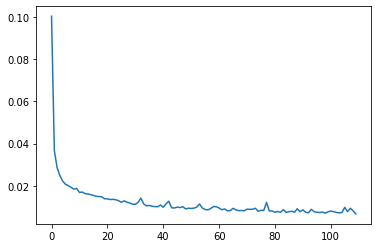

In [24]:
# Muestra por pantalla el valor actual de pérdida y dibuja en una gráfica la curva de pérdida
plt.plot(range(len(net.loss_curve_)), net.loss_curve_)

In [25]:
# Mustra por pantalla el score para el conjunto de entrenamiento. 
#¿Cómo compara con el valor mostrado en el entrenamiento con el del conjunto de validación?

net.score(xtrain,ytrain)

0.8612813009632264

## 5 Estudio de las incertidumbres

Una vez entrenada la red se utiliza el conjunto *test* para comprobar los resultados y caracterizar las incertidumbres. Dado un conjunto de espectros de entrada, la red asignará a cada espectro un valor de salida que corresponde con una temperatura, una gravedad y una metalicidad. Para obtener estos valores se utiliza el método *predict()* de la red neuronal.

Hay que recordar que la red fue entrenada con los objetivos (valores de salida) escalados y hay que desescalarlos.

In [32]:
# Obtener los parámetros estelares que la red entrenada asocia a los espectros del conjunto test
# Recordar que los valores de los parámetros con los que se entrenó la red han sido escalados.

test_predictions = scaler.inverse_transform(net.predict(xtest))# rellenar los huecos con los valores para obtener las predicciones de la red asociadas a los espectros del conjunto test
test_values = scaler.inverse_transform(ytest) # rellenar para obtener los valores de los parámetros reales del conjunto test

print(test_predictions) # rellenar para mostrar los valores de las predicciones

[[ 8.05373105e+03  3.95661219e+00 -4.00109024e-01]
 [ 7.13623233e+03  1.20451134e+00  1.09826381e+00]
 [ 6.67466513e+03  4.41827421e+00  1.13972301e+00]
 ...
 [ 6.73959708e+03  1.15548608e+00 -5.00437936e-02]
 [ 8.02552400e+03  3.58019832e+00  4.86286289e-01]
 [ 8.05376105e+03  4.77763583e+00 -3.50720324e-01]]


El error medio o *bias* para cada variable viene dado por el valor medio de la distribución *valores_de_la_red* - *valores_reales*. Para obtener estas distribuciones tenemos que acceder a los elementos de *test_predictions* y *test_values* que corresponden a cada parámetro astrofísico. Éstos están guardados en el orden en que los definimos (temperatura, gravedad, metalicidad).

Dado un *array* de *arrays*, si se quiere acceder al primer elemento de cada uno de los *arrays* se puede utilizar la siguiente nomenclatura:
```
primer_valor_cada_array = array_de_array[:,0]
```
Cambiando el índice se puede obtener todos los segundos, los terceros, etc.

In [33]:
# Construir las distribuciones de predicciones menos valores reales
delta_teff = test_predictions[:,0] - test_values[:,0] # rellenar los huecos
delta_logg = test_predictions[:,1] - test_values[:,1] # rellenar los huecos # rellenar
delta_mh = test_predictions[:,2] - test_values[:,2] # rellenar los huecos # rellenar

Text(0.5, 0, '$[M/H]$')

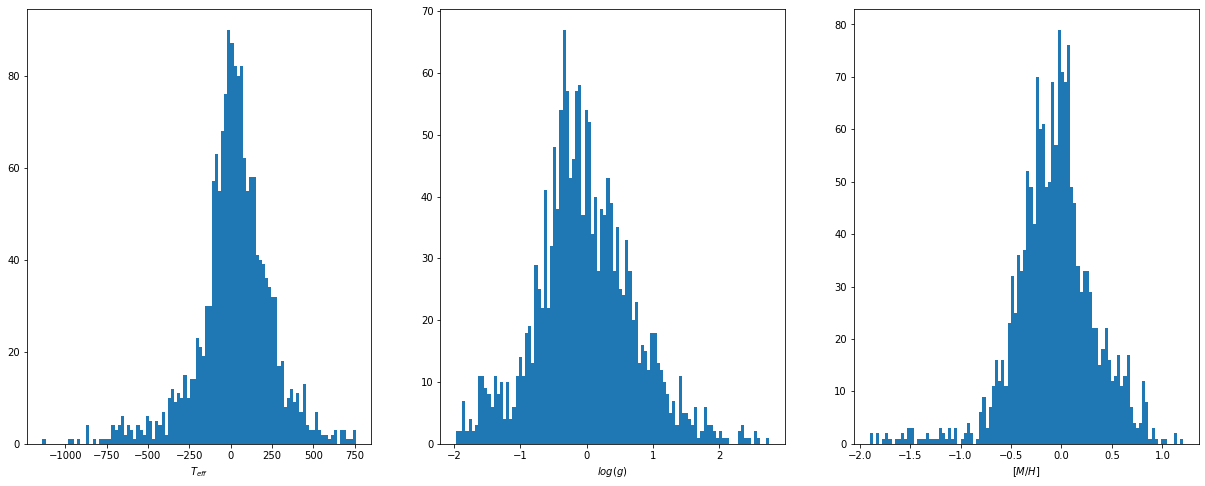

In [34]:
# Ilustrar en un gráfico las distribuciones de diferencias (deltas). Para ello pintar un histograma usando plt.hist(). 

plt.figure(figsize=(21,8))
plt.subplot(131)
plt.hist(delta_teff,bins=100)
plt.xlabel(r"$T_{eff}$")
plt.subplot(132)
plt.hist(delta_logg,bins=100)
plt.xlabel(r"$log(g)$")
plt.subplot(133)
plt.hist(delta_mh,bins=100)
plt.xlabel(r"$[M/H]$")


In [39]:
# en esta celda vamos a obtener los biases y las uncertidumbres.
# para obtenerlas hay que utilizar los métodos mean() y std() 
bias_teff = delta_teff.mean()
bias_logg = delta_logg.mean()
bias_mh = delta_mh.mean()
uncert_teff = delta_teff.std()
uncert_logg = delta_logg.std()
uncert_mh = delta_mh.std()

In [42]:
# mostrar los resultados de bias y uncert para cada variable
print("Teff: bias = {} and unc = {}".format(bias_teff,uncert_teff))
print("logg: bias = {} and unc = {}".format(bias_logg,uncert_logg))
print("mh: bias = {} and unc = {}".format(bias_mh,uncert_mh))

Teff: bias = 21.337760269639933 and unc = 227.91276451308335
logg: bias = -0.023459886123984475 and unc = 0.7404706452933401
mh: bias = -0.07410093257983112 and unc = 0.4015374839302849


## 6 Nota final para el entrenamiento

Normalmente hay que realizar un estudio detallado para encontrar la configuración óptima de la red a través de los posibles valores de parámetros e hiperparámetros. La configuración óptima dependerá del tipo de problema que se quiere resolver, los datos de entrenamiento...; por ello es bueno cambiar la arquitectura y los valores de los parámetros y entrenar con los mismos datos.

Utiliza las celdas de debajo (tantas como necesites) para construir nuevas redes y comparar los resultados que dan cada una de ellas

## 7 Aplicación a espectros reales (medidos por RAVE)

Ahora se va a aplicar la red neuronal entrenada a datos reales. 
Los ficheros *input_spectra_X.pkl* contienen espectros medidos por el experimento [RAVE](https://www.rave-survey.org/) y, a partir de ellos, la red neuronal va a asignar a cada espectro una temperatura efectiva, un logaritmo de la gravedad y una metalicidad. Posteriormente, se mostrará en un gráfico las gravedades frente a las temperaturas. Así, el esquema de este análisis es:
- Lectura de datos: entender las diferencias entre los datos y las simulaciones
- Determinación de los parámetros astrofísicos
- Dibujar el diagrama de logg vs Teff (¿es, en tu caso, necesaria una corrección?)

### 7.1 Lectura de datos

Puesto que los ficheros de datos están separados, por comodidad vamos a crear un *DataFrame* vacío y, mediante un bucle for, vamos a ir almacenando las tablas de cada fichero en el mismo *DataFrame*.

In [43]:
# rellenar el hueco para leer los datos y almacenarlos en data
data = pd.DataFrame()
for i in range(20):
    data = pd.concat((data,pd.read_pickle("data/input_spectra_{}.pkl".format(i))))

Text(0, 0.5, '$Normalized flux$')

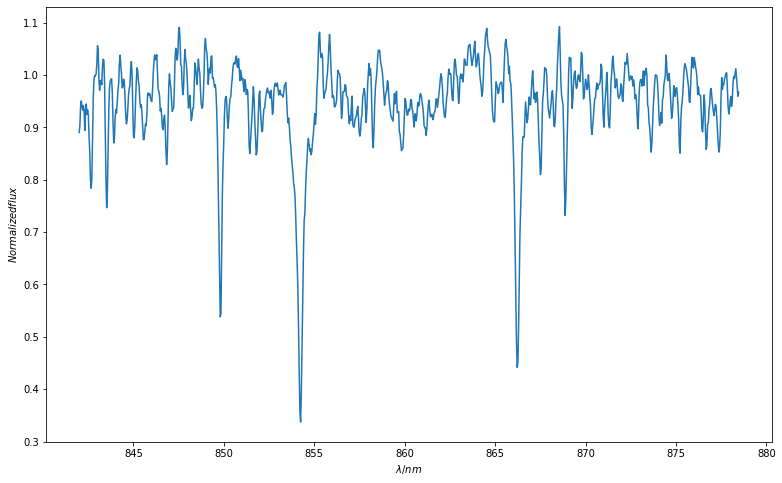

In [45]:
# pintar algunos espectros
idx = 21 
plt.figure(figsize=(13,8))
plt.plot(wlen,data["spectrum"].iloc[idx])
plt.xlabel(r"$\lambda /nm$")
plt.ylabel(r"$Normalized flux$")

### 7.2 Inferencia: determinación de parámetros astrofísicos

In [55]:
data_specs = data["spectrum"].values.tolist() # obtener los valores de los espectros. Nota: se convierte a una lista porque MLPRegressor.predict recibe como argumento una lista
data_preds = scaler.inverse_transform(net.predict(data_specs)) # aplicar la red neuronal

In [56]:
# Utiliza esta celda (y tantas como necesites) para explorar los resultados

data_preds.mean(axis=0)

array([ 4.26489851e+03,  1.97803579e+00, -6.50669326e-01])

### 7.3 Diagrama de inferencias

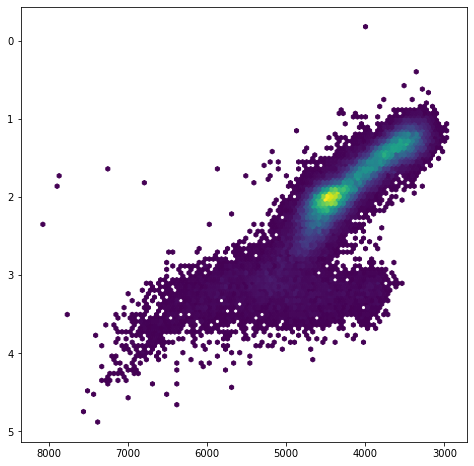

In [57]:
# rellenar para dibujar el diagrama.
# Nota: el diagrama que se quiere dibujar debe tener los ejes invertidos. Si se quiere dibujar el eje X invertido hay que llamar a la instrucción plt.gca().invert_xaxis()

plt.figure(figsize=(8,8))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.hexbin(data_preds[:,0], data_preds[:,1], mincnt=0.2)
